# Main Notebook


## Imports


### Adds src folder to path


In [1]:
import sys
import os

# Add the directory `src` containing python code
sys.path.append(os.path.abspath("../src"))

In [2]:
# autoreload
%load_ext autoreload
%autoreload 2

### Import common libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Load data


In [4]:
col_to_drop = [
    "Alley",
    "Utilities",
    "LandSlope",
    "MSSubClass",
    "OpenPorchSF",
    "BsmtHalfBath",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "MiscVal",
    "MoSold",
    "LowQualFinSF",
    "EnclosedPorch",
    "GrLivArea",
    "3SsnPorch",
]

In [5]:
# load data
data = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("../data/house-prices-advanced-regression-techniques/test.csv")

In [6]:
data.select_dtypes(include="int64").sample(5).T

,903,344,309,1073,1422
Id,904,345,310,1074,1423
MSSubClass,20,160,20,60,120
LotArea,14859,2592,12378,7950,4435
OverallQual,7,5,9,6,6
OverallCond,5,3,5,6,5
YearBuilt,2006,1976,2003,1977,2003
YearRemodAdd,2006,1976,2004,1977,2003
BsmtFinSF1,0,129,1274,535,686
BsmtFinSF2,0,232,0,0,0
BsmtUnfSF,1670,175,622,155,162


In [7]:
data[data["TotalBsmtSF"] > data["1stFlrSF"]].select_dtypes(include=[np.number]).T

,41,126,153,246,269,271,279,313,332,364,...,1169,1191,1264,1287,1298,1301,1335,1364,1398,1403
Id,42.0,127.0,154.0,247.0,270.0,272.0,280.0,314.0,333.0,365.0,...,1170.0,1192.0,1265.0,1288.0,1299.0,1302.0,1336.0,1365.0,1399.0,1404.0
MSSubClass,20.0,120.0,20.0,190.0,20.0,20.0,60.0,20.0,20.0,60.0,...,60.0,160.0,120.0,20.0,60.0,70.0,20.0,160.0,50.0,20.0
LotFrontage,115.0,NaN,NaN,69.0,NaN,73.0,83.0,150.0,85.0,NaN,...,118.0,24.0,34.0,NaN,313.0,NaN,80.0,30.0,60.0,49.0
LotArea,16905.0,4928.0,13500.0,9142.0,7917.0,39104.0,10005.0,215245.0,10655.0,18800.0,...,35760.0,2645.0,4060.0,36500.0,63887.0,7500.0,9650.0,3180.0,7200.0,15256.0
OverallQual,5.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,8.0,6.0,...,10.0,8.0,6.0,5.0,10.0,6.0,6.0,7.0,5.0,8.0
OverallCond,6.0,5.0,7.0,8.0,7.0,7.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,7.0,5.0,5.0,4.0,5.0
YearBuilt,1959.0,1976.0,1960.0,1910.0,1976.0,1954.0,1977.0,1965.0,2003.0,1976.0,...,1995.0,1999.0,1998.0,1964.0,2008.0,1942.0,1977.0,2005.0,1950.0,2007.0
YearRemodAdd,1959.0,1976.0,1975.0,1950.0,1976.0,2005.0,1977.0,1965.0,2004.0,1976.0,...,1996.0,2000.0,1999.0,1964.0,2008.0,1950.0,1977.0,2005.0,1982.0,2007.0
MasVnrArea,0.0,0.0,0.0,0.0,174.0,0.0,299.0,0.0,296.0,120.0,...,1378.0,456.0,0.0,621.0,796.0,0.0,360.0,0.0,0.0,84.0
BsmtFinSF1,967.0,120.0,429.0,0.0,751.0,226.0,392.0,1236.0,1124.0,712.0,...,1387.0,0.0,266.0,812.0,5644.0,547.0,686.0,0.0,180.0,929.0


In [8]:
# data.set_index("Id", inplace=True)
data.drop(inplace=True, columns=["Id"])
# test_data.dropna(inplace=True)

# drop columns
data = data.drop(columns=col_to_drop)

data.sample(10)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,WoodDeckSF,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice
196,RL,79.0,9416,Pave,Reg,Lvl,Inside,Somerst,Norm,Norm,...,171,266,0,NaN,NaN,NaN,2007,New,Partial,311872
1283,RL,94.0,9400,Pave,Reg,Low,Corner,Mitchel,Norm,Norm,...,128,0,0,NaN,NaN,NaN,2010,WD,Normal,139000
312,RM,65.0,7800,Pave,Reg,Lvl,Inside,OldTown,Artery,Norm,...,0,271,0,NaN,MnPrv,NaN,2006,WD,Normal,119900
409,FV,85.0,10800,Pave,Reg,Lvl,Inside,Somerst,Norm,Norm,...,0,0,0,NaN,NaN,NaN,2008,New,Partial,339750
1440,RL,79.0,11526,Pave,IR1,Bnk,Inside,Crawfor,Norm,Norm,...,431,0,0,NaN,NaN,NaN,2008,WD,Normal,191000
370,RL,NaN,8121,Pave,IR1,Lvl,Inside,Gilbert,Norm,Norm,...,100,0,0,NaN,NaN,NaN,2006,WD,Normal,172400
1432,RL,60.0,10800,Pave,Reg,Lvl,Inside,OldTown,Norm,Norm,...,0,0,0,NaN,NaN,NaN,2007,WD,Normal,64500
1319,RL,75.0,10215,Pave,Reg,Bnk,Inside,Edwards,Norm,Norm,...,0,0,0,NaN,NaN,NaN,2007,WD,Normal,111000
1287,RL,NaN,36500,Pave,IR1,Low,Inside,ClearCr,Norm,Norm,...,168,0,0,NaN,NaN,NaN,2006,WD,Normal,190000
27,RL,98.0,11478,Pave,Reg,Lvl,Inside,NridgHt,Norm,Norm,...,0,0,0,NaN,NaN,NaN,2010,WD,Normal,306000


In [9]:
# Only normal sales
data = data[data["SaleCondition"] == "Normal"]
data.sample(1)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,WoodDeckSF,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice
760,RL,70.0,9100,Pave,Reg,Lvl,Inside,NAmes,Norm,Norm,...,0,0,0,NaN,NaN,Shed,2009,WD,Normal,127500


In [10]:
# use np.where to pick the first floor size

data["BaseFloorSF"] = np.where(
    data["TotalBsmtSF"] > data["1stFlrSF"],
    data["TotalBsmtSF"],
    data["1stFlrSF"],
)
data = data.drop(columns=["TotalBsmtSF", "1stFlrSF"])

In [11]:
# use np.where to create a new column using conditional logic

data["SaleAge"] = np.where(
    data["YearBuilt"] > data["YearRemodAdd"],
    data["YrSold"] - data["YearBuilt"],
    data["YrSold"] - data["YearRemodAdd"],
)
data = data.drop(columns=["YearBuilt", "YearRemodAdd", "YrSold"])

In [12]:
# # Only MSZoning with  Residential Low Density
# data = data[data["MSZoning"] == "RL" ]
# data.sample(1)

In [13]:
# Only aim for house 500k or bellow
data = data[data["SalePrice"] <= 560000]
data.sample(1)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,BaseFloorSF,SaleAge
1327,RL,60.0,6600,Pave,Reg,Lvl,Inside,Mitchel,Norm,Norm,...,0,0,NaN,MnPrv,NaN,WD,Normal,130500,816,0


MSZoning
RL         953
RM         189
FV          39
RH          11
C (all)      4
Name: count, dtype: int64


<Axes: >

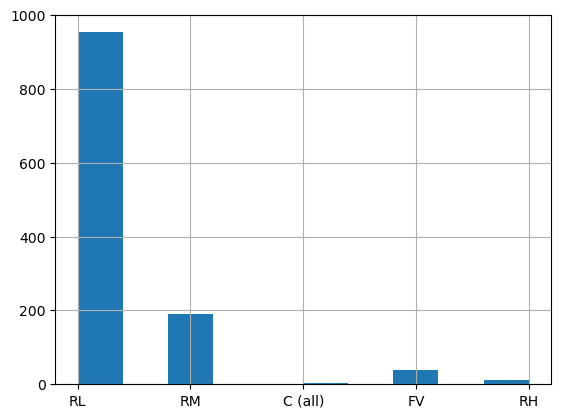

In [14]:
col = "MSZoning"
print(data[col].value_counts(dropna=False))
data[col].hist()

In [15]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Explorer the dat


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1196 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1196 non-null   object 
 1   LotFrontage    959 non-null    float64
 2   LotArea        1196 non-null   int64  
 3   Street         1196 non-null   object 
 4   LotShape       1196 non-null   object 
 5   LandContour    1196 non-null   object 
 6   LotConfig      1196 non-null   object 
 7   Neighborhood   1196 non-null   object 
 8   Condition1     1196 non-null   object 
 9   Condition2     1196 non-null   object 
 10  BldgType       1196 non-null   object 
 11  HouseStyle     1196 non-null   object 
 12  OverallQual    1196 non-null   int64  
 13  OverallCond    1196 non-null   int64  
 14  RoofStyle      1196 non-null   object 
 15  RoofMatl       1196 non-null   object 
 16  Exterior1st    1196 non-null   object 
 17  Exterior2nd    1196 non-null   object 
 18  MasVnrType   

In [17]:
# sale price

data["SalePrice"].describe().T

count      1196.000000
mean     174341.353679
std       66458.779962
min       39300.000000
25%      130000.000000
50%      160000.000000
75%      205000.000000
max      555000.000000
Name: SalePrice, dtype: float64

In [18]:
data

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,BaseFloorSF,SaleAge
0,RL,65.0,8450,Pave,Reg,Lvl,Inside,CollgCr,Norm,Norm,...,0,0,NaN,NaN,NaN,WD,Normal,208500,856,5
1,RL,80.0,9600,Pave,Reg,Lvl,FR2,Veenker,Feedr,Norm,...,0,0,NaN,NaN,NaN,WD,Normal,181500,1262,31
2,RL,68.0,11250,Pave,IR1,Lvl,Inside,CollgCr,Norm,Norm,...,0,0,NaN,NaN,NaN,WD,Normal,223500,920,6
4,RL,84.0,14260,Pave,IR1,Lvl,FR2,NoRidge,Norm,Norm,...,0,0,NaN,NaN,NaN,WD,Normal,250000,1145,8
5,RL,85.0,14115,Pave,IR1,Lvl,Inside,Mitchel,Norm,Norm,...,0,0,NaN,MnPrv,Shed,WD,Normal,143000,796,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Pave,Reg,Lvl,Inside,Gilbert,Norm,Norm,...,0,0,NaN,NaN,NaN,WD,Normal,175000,953,7
1456,RL,85.0,13175,Pave,Reg,Lvl,Inside,NWAmes,Norm,Norm,...,0,0,NaN,MnPrv,NaN,WD,Normal,210000,2073,22
1457,RL,66.0,9042,Pave,Reg,Lvl,Inside,Crawfor,Norm,Norm,...,0,0,NaN,GdPrv,Shed,WD,Normal,266500,1188,4
1458,RL,68.0,9717,Pave,Reg,Lvl,Inside,NAmes,Norm,Norm,...,0,0,NaN,NaN,NaN,WD,Normal,142125,1078,14


In [19]:
data[data["SalePrice"] > 550000]

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,BaseFloorSF,SaleAge
440,RL,105.0,15431,Pave,Reg,Lvl,Inside,NridgHt,Norm,Norm,...,170,0,NaN,NaN,NaN,WD,Normal,555000,3094,1


<Axes: xlabel='SalePrice', ylabel='Count'>

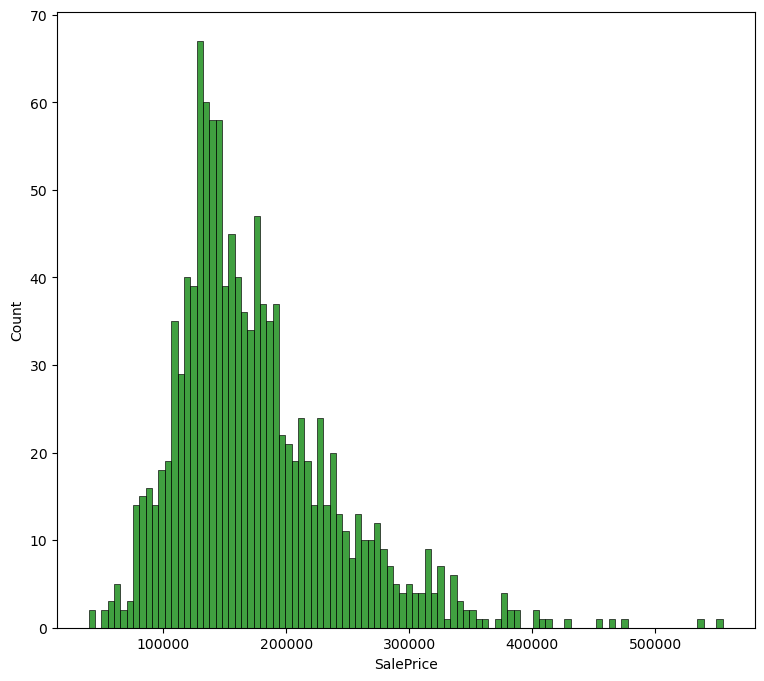

In [20]:
plt.figure(figsize=(9, 8))
sns.histplot(data=data, x="SalePrice", color="g", bins=100, kde_kws={"alpha": 0.4})

In [21]:
from data_proccessing_util import get_df_info


get_df_info(data)

Shape:  (1196, 62) 

Columns:  ['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'SalePrice', 'BaseFloorSF', 'SaleAge'] 

Categorical columns:  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 

In [22]:
# sns.pairplot(data.sample(100))

In [23]:
# find categories

len(data.dtypes.to_list())

62

### Numerical featues


In [24]:
# use numpy number class to select all the numeric features
num_data = data.select_dtypes(include=[np.number])
num_columns = num_data.columns.to_list()
num_columns.remove("SalePrice")

print(num_columns)
num_data.describe().T

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'BaseFloorSF', 'SaleAge']


,count,mean,std,min,25%,50%,75%,max
LotFrontage,959.0,69.037539,22.935842,21.0,59.00,69.0,80.00,313.0
LotArea,1196.0,10513.204013,10660.249900,1300.0,7538.75,9458.5,11429.75,215245.0
OverallQual,1196.0,6.000000,1.309125,1.0,5.00,6.0,7.00,10.0
OverallCond,1196.0,5.659699,1.140541,1.0,5.00,5.0,6.00,9.0
MasVnrArea,1192.0,94.574664,169.310429,0.0,0.00,0.0,148.00,1600.0
2ndFlrSF,1196.0,350.999164,427.876554,0.0,0.00,0.0,735.00,1818.0
BsmtFullBath,1196.0,0.429766,0.508588,0.0,0.00,0.0,1.00,2.0
FullBath,1196.0,1.534281,0.533085,0.0,1.00,2.0,2.00,3.0
HalfBath,1196.0,0.384615,0.500274,0.0,0.00,0.0,1.00,2.0
BedroomAbvGr,1196.0,2.872910,0.790467,0.0,2.00,3.0,3.00,6.0


In [25]:
# log_num_data =  num_data["area"].apply(lambda x: np.log(x))

# log_num_data.hist(figsize=(8,8), bins=50, xlabelsize=8, ylabelsize=8)
# num_data["area"] = log_num_data # uncomment to use the log of the area instead of the area data

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'MasVnrArea'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageYrBlt'}>,
        <Axes: title={'center': 'GarageCars'}>],
       [<Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'ScreenPorch'}>,
        <Axes: title={'center': 'PoolArea'}>,
        <Axes: title={'center': 'SalePrice'}>],
       [<Axes: title={'center': 'Ba

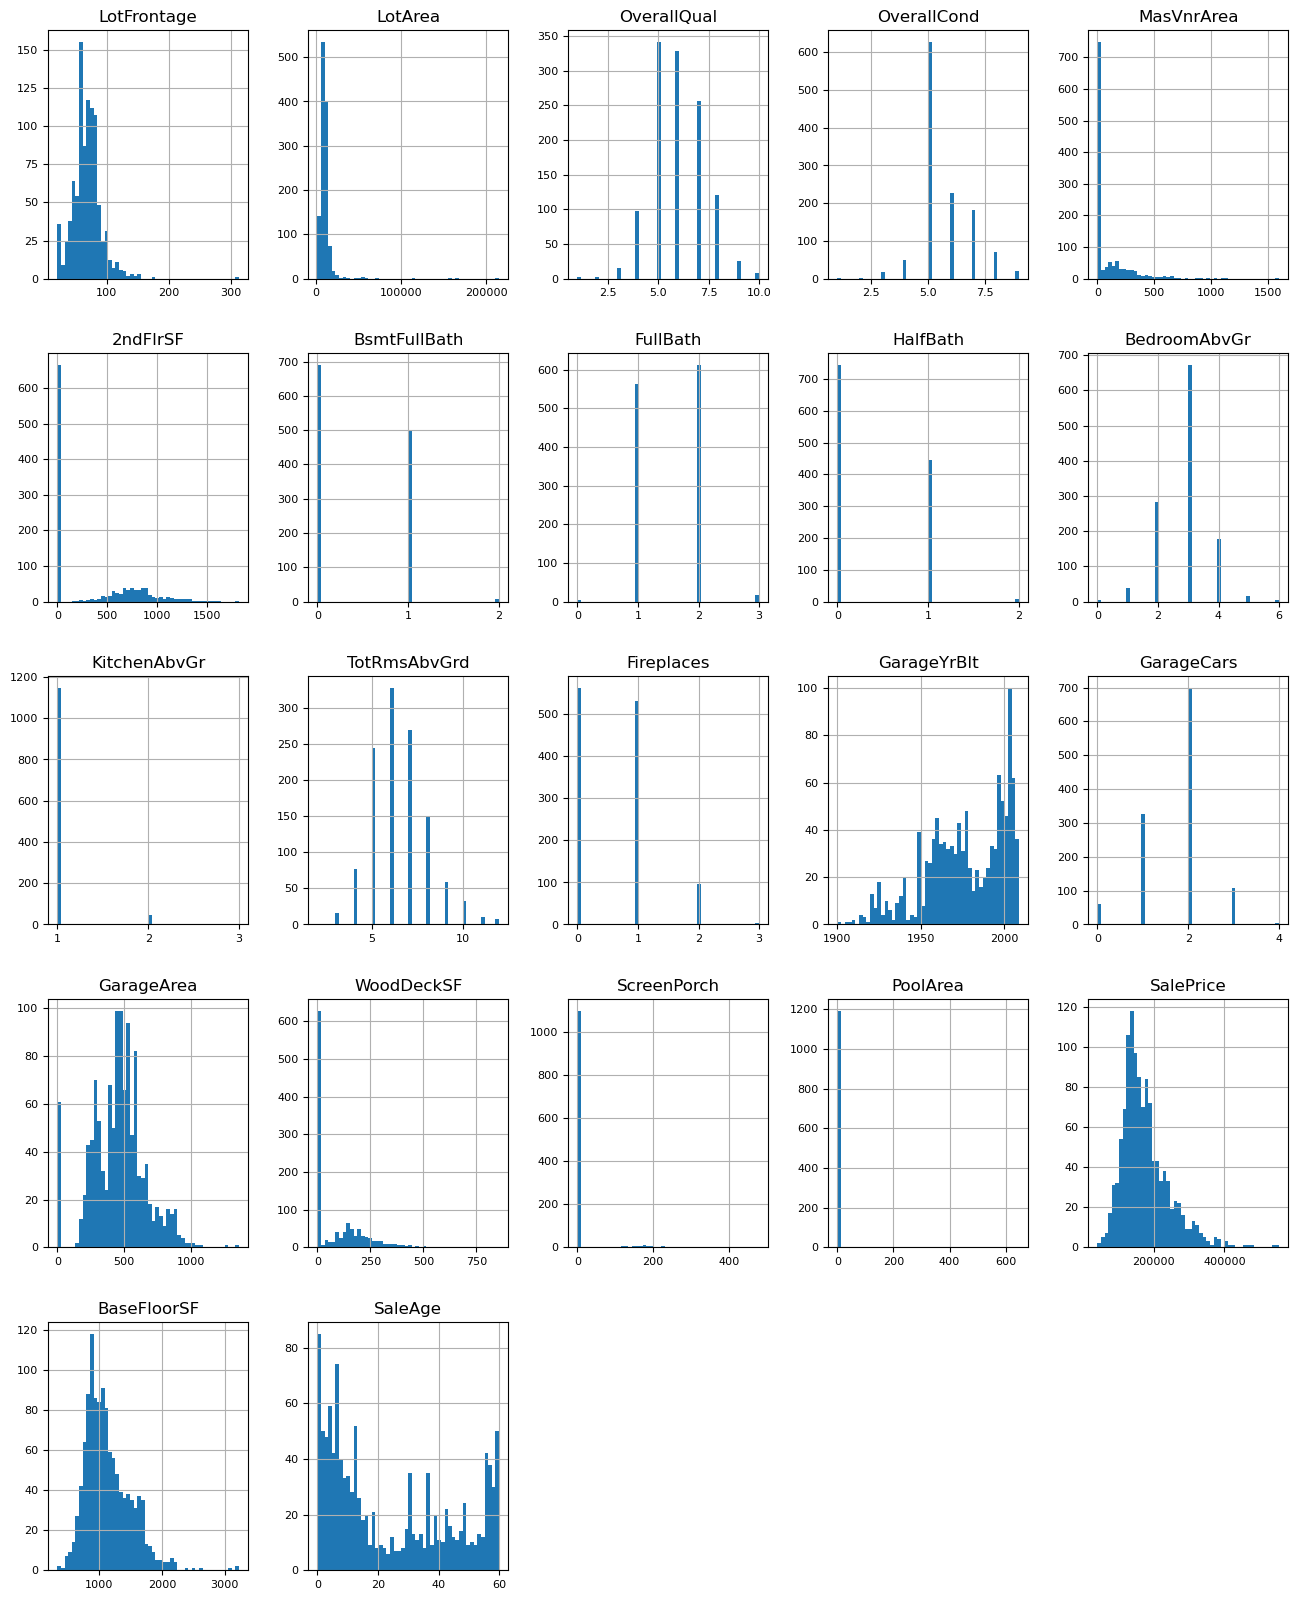

In [26]:
# numeric features distribution

num_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [27]:
# sns.pairplot(data[["SalePrice"] + num_columns])

### Categorical features


In [28]:
# uses object class to select categorical features
cat_data = data.select_dtypes(include=[object])
cat_columns = cat_data.columns.to_list()
print(cat_columns)
cat_data.describe().T

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


,count,unique,top,freq
MSZoning,1196,5,RL,953
Street,1196,2,Pave,1191
LotShape,1196,4,Reg,758
LandContour,1196,4,Lvl,1080
LotConfig,1196,5,Inside,862
Neighborhood,1196,25,NAmes,198
Condition1,1196,9,Norm,1029
Condition2,1196,7,Norm,1185
BldgType,1196,5,1Fam,1004
HouseStyle,1196,8,1Story,577


In [29]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [30]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [31]:
y = data["SalePrice"]
# X = data.drop(columns=["SalePrice"]) # uncomment to use all the features instead of only numbertic
X = data[num_columns]  # model only the numeric features.

# y_train = y
# X_train = X

# y_test = test_data["SalePrice"]
# X_test = test_data.drop(columns=["SalePrice"])

## Model


### Transform pipeline


In [32]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [33]:
# # create the drop list for the categorical data
# drop_cat = ["no" for _ in cat_columns]
# drop_cat[-1] = "unfurnished"
# drop_cat
drop_cat = []

In [34]:
# Create preprocessor

# categorical data transformer
categorical = Pipeline(
    steps=[
        (
            "encoding",
            OneHotEncoder(
                handle_unknown="ignore",
                # drop=[]
                drop="first",
            ),
        )
    ]
)

# numberical data scaling transformer
numerical = Pipeline(steps=[("scaling", StandardScaler())])

preproccesor = ColumnTransformer(
    [
        # ("categorical", categorical, cat_columns), # uncomment when using all the features
        ("numerical", numerical, num_columns)
    ]
)

model = Pipeline(
    steps=[
        ("prepocessor", preproccesor),
        (
            "regressor",
            TransformedTargetRegressor(
                regressor=LinearRegression(), transformer=MinMaxScaler()
            ),
        ),
    ]
)

### Train model


In [35]:
# Create the training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Test the model


In [ ]:
# get prediction with test data

# y_pred = model.predict(test_data)
y_pred = model.predict(X_test)

In [ ]:
# import sklean model testing methods

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error  # type: ignore

# test model using the predicted y and the test y (original not modified y)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# uses the square=False attribute to return the not squared (root)
rmse = root_mean_squared_error(
    y_test,
    y_pred,
)
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae}\nMSE: {mse}\n\nRMSE: {rmse}\nR2: {r2}")

MAE: 18529.698962577113
MSE: 725717655.1371285

RMSE: 26939.147260764
R2: 0.8579516189390353


In [ ]:
num_col_with_pric = num_columns.copy()
num_col_with_pric.append("SalePrice")

In [ ]:
# creates a random dictionary to use as the UI test data

from typing import Any


sample_prediction_row = data[num_col_with_pric].sample(1)
sample_idx = sample_prediction_row["SalePrice"].index[0]
print(sample_idx)
sample_prediction_row

1385


,LotArea,OverallQual,OverallCond,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,ScreenPorch,PoolArea,BaseFloorSF,SaleAge,SalePrice
1385,5436,4,8,358,1,1,0,3,1,7,0,1,240,0,0,0,796,3,125500


In [ ]:
print(f"Price: {sample_prediction_row['SalePrice']}")

Price: 1385    125500
Name: SalePrice, dtype: int64


In [ ]:
sample_prediction_row.drop(columns=["SalePrice"]).to_dict(orient="index").get(400)

In [ ]:
# In this implementation the values are just number, so sample prediction is a dictionary with values
sample_prediction: dict | Any = (
    sample_prediction_row.drop(columns=["SalePrice"])
    .to_dict(orient="index")
    .get(sample_idx)
)
observation = pd.Series(sample_prediction).to_frame().T
observation

,LotArea,OverallQual,OverallCond,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,ScreenPorch,PoolArea,BaseFloorSF,SaleAge
0,5436,4,8,358,1,1,0,3,1,7,0,1,240,0,0,0,796,3


In [ ]:
# make prediction of observation


model.predict(observation)[0]

112693.78332959992

### Graph prediction


<Axes: xlabel='SalePrice'>

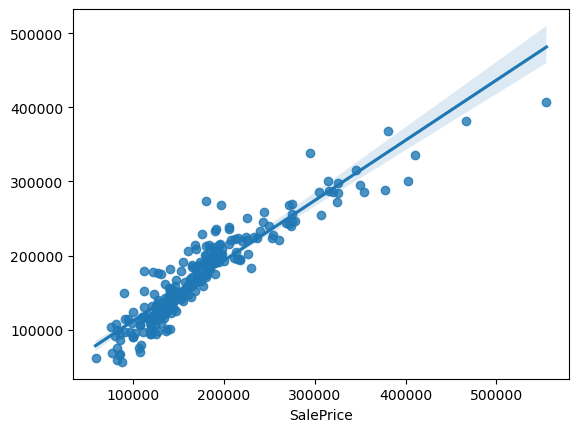

In [ ]:
sns.regplot(x=y_test, y=[y_pred])

In [ ]:
data[num_columns].head(1)

,LotArea,OverallQual,OverallCond,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,ScreenPorch,PoolArea,BaseFloorSF,SaleAge
0,8450,7,5,854,1,2,1,3,1,8,0,2,548,0,0,0,856,5


In [ ]:
import statsmodels.api as sm

# import statsmodels.formula.api as sma

# formula = ""

smX = data[num_columns]

smX = sm.add_constant(smX)

smY = data["SalePrice"]

sum_mol = sm.OLS(smY, smX)

result = sum_mol.fit()

In [ ]:
data[num_columns].sample(5)

,LotArea,OverallQual,OverallCond,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,ScreenPorch,PoolArea,BaseFloorSF,SaleAge
498,7800,5,7,0,0,1,0,3,1,5,0,1,288,64,0,0,899,5
746,8795,7,5,1276,0,2,1,4,1,8,1,2,554,224,0,0,980,9
871,8750,6,5,878,0,2,1,3,1,7,0,2,523,0,0,0,804,12
229,3182,7,5,0,0,2,0,2,1,7,1,2,430,143,0,0,1555,3
1190,32463,4,4,0,1,1,0,3,1,7,1,4,1356,439,0,0,1622,32


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     409.3
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:45:27   Log-Likelihood:                -13792.
No. Observations:                1196   AIC:                         2.762e+04
Df Residuals:                    1177   BIC:                         2.772e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.702e+04   8427.754     -5.579      0.000   -6.36e+04   -3.05e+04
LotArea          0.5839      0.073      8.022      0.000       0.441       0.727
OverallQual   1.738e+04    847.230     20.518      0.000    1.57e+04     1.9e+04
OverallCond   2604.2655    697.840      3.732      0.000    1235.117    3973.414
2ndFlrSF        40.9891      3.716     11.029      0.000      33.698      48.281
BsmtFullBath  1.407e+04   1552.638      9.063      0.000     1.1e+04    1.71e+04
FullBath      5837.2192   2120.115      2.753      0.006    1677.592    9996.846
HalfBath      6709.8894   1992.543      3.368      0.001    2800.557    1.06e+04
BedroomAbvGr -6274.0204   1370.202     -4.579      0.000   -8962.332   -3585.709
KitchenAbvGr -2.584e+04   4024.494     -6.422      0.000   -3.37e+04   -1.79e+04
TotRmsAbvGrd  1330.4789    976.340      1.363      0.173    -585.082    3246.040
Fireplaces    3341.3103   1374.414      2.431      0.015     644.735    6037.885
GarageCars    4375.9989   2287.178      1.913      0.056    -111.402    8863.400
GarageArea      30.0644      7.800      3.854      0.000      14.760      45.369
WoodDeckSF      23.2535      6.080      3.824      0.000      11.324      35.183
ScreenPorch     44.8871     13.254      3.387      0.001      18.883      70.891
PoolArea       -21.2607     24.876     -0.855      0.393     -70.067      27.545
BaseFloorSF     71.0977      3.776     18.829      0.000      63.689      78.506
SaleAge       -267.9410     46.880     -5.715      0.000    -359.919    -175.963
==============================================================================
Omnibus:                      140.879   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.665
Skew:                           0.471   Prob(JB):                    4.56e-135
Kurtosis:                       6.395   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""